# Dataset analysis 

In [1]:
import numpy as np
import scipy.ndimage.morphology as morph
import math
import pandas as pd
import os

import matplotlib.pyplot as plt
from matplotlib import  cm
from typing import Dict

In [2]:
def clean_mask(volume : np.ndarray, iterations : int = 1):
    """ Function to clean up a mask
    """
    def remove_noise(volume, iterations):
        struct = morph.generate_binary_structure(3, 3)
        return morph.binary_erosion(
            morph.binary_closing(
                morph.binary_opening(volume, structure=struct, iterations = iterations)
                , structure=struct, iterations = iterations
            ), structure=struct, iterations = 2
        )
    
    temp = np.zeros((*volume.shape, 6), dtype = int)
    for i in range(6):
        temp[:,:,:, i] = remove_noise((volume==i), iterations)

    volume = np.argmax(temp, axis = 3)
    return volume



In [3]:
def plot_volumes(volumes : Dict, title : str, savename = '3d_reconstruct.png'):
    plt.figure(figsize=(10,10))
    for i in [0,1, 2]:
            for j in range(3):
                plt.subplot(3,3,i*3+j+1)
                plt.imshow(cm.gist_stern_r(np.take(volumes[i], volumes[i].shape[j]//2, axis=j)*51))
                #plt.axis('off')
                plt.title(f'Result model axis {i}\nsliced along axis {j}')
    plt.suptitle(title)
    plt.savefig(savename)            
    plt.tight_layout()
    plt.show()

def plot_ground_truth(ground_truth : np.ndarray, savename : str = '3d_reconstruct_gt.png'):
    plt.figure(figsize=(10,5))
    for j in range(3):
        plt.subplot(1,3,j+1)
        plt.imshow(cm.gist_stern_r(np.take(ground_truth, ground_truth.shape[j]//2, axis=j)*51))
        plt.suptitle('Ground truth')
        plt.title(f'slice along axis {j}')
    plt.tight_layout()
    plt.savefig(savename)
    plt.show()  

def occurance_counts(volumes : np.ndarray, ground_truth : np.ndarray) -> pd.DataFrame:
    volumes_stack = np.stack([ground_truth] + [volumes[i] for i in range(3)], axis = 3)
    occurance_counts = pd.DataFrame()
    for i in range(6):
        overlay = ground_truth == i
        cnts = np.unique(volumes_stack[overlay], axis=0, return_counts = True)
        print(f'cnts {cnts}')
        counts_frame = pd.DataFrame(cnts[0], columns=['ground_truth', 'm0', 'm1', 'm2'])
        counts_frame['counts'] = cnts[1]
        occurance_counts = occurance_counts.append(counts_frame)
    occurance_counts = occurance_counts.pivot(index=['m0', 'm1', 'm2'], columns='ground_truth', values='counts')
    return occurance_counts
    

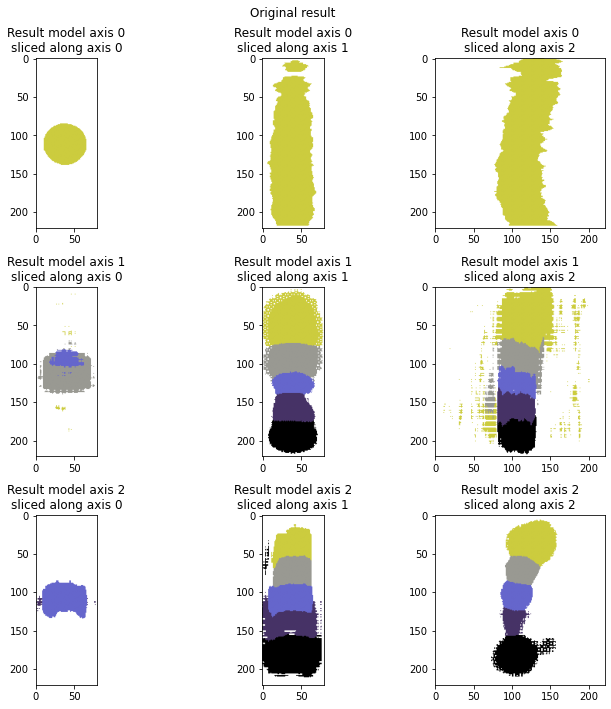

dimension from file scan_MyoSegmenTUM_043_res.npy
	from dim 0 : shape (221, 221, 80).
	from dim 1 : shape (221, 221, 80).
	from dim 2 : shape (221, 221, 80).
	




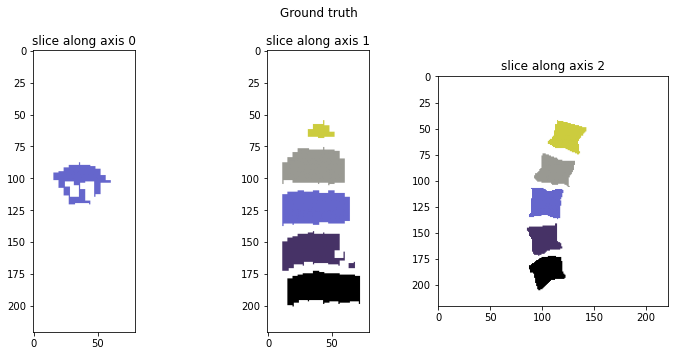

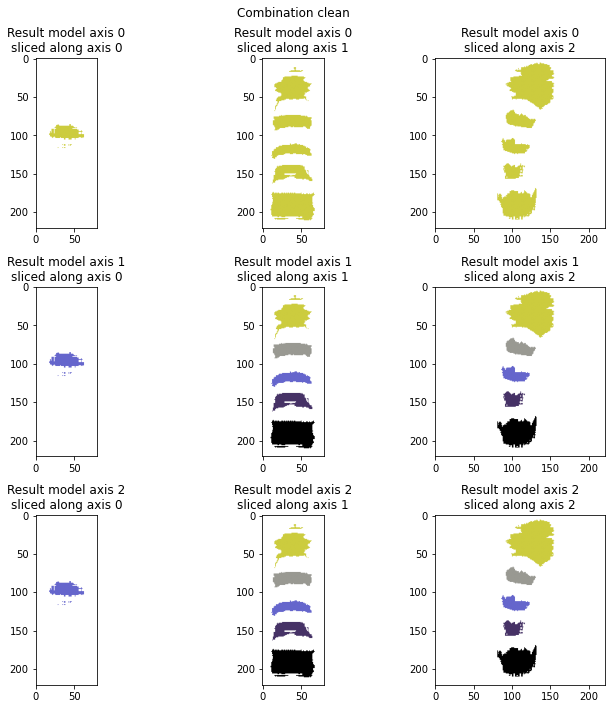

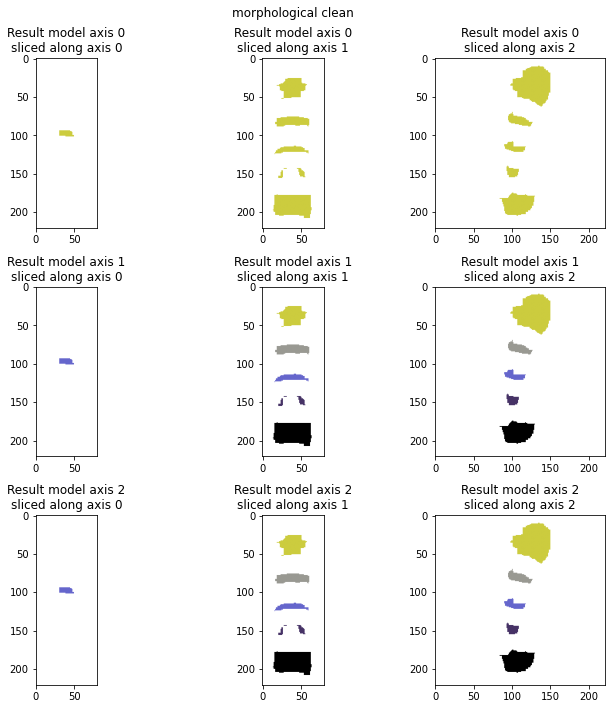

ground_truth          0        1        2        3        4        5
m0 m1 m2                                                            
0  0  0       3604267.0  11673.0  17233.0  16275.0  19262.0   2971.0
1  1  1         86946.0  12538.0      NaN      NaN      NaN      NaN
   2  2         16552.0      1.0  12439.0      NaN      NaN      NaN
   3  3          4953.0      NaN      NaN  15564.0      NaN      NaN
   4  4          9343.0      NaN      NaN      NaN  11528.0      NaN
   5  5         39961.0      NaN      NaN      NaN      4.0  25770.0
ground_truth          0        1        2        3        4        5
m0 m1 m2                                                            
0  0  0       3687537.0  15198.0  21868.0  24997.0  26054.0   6276.0
1  1  1         52077.0   9014.0      NaN      NaN      NaN      NaN
   2  2          4687.0      NaN   7804.0      NaN      NaN      NaN
   3  3           238.0      NaN      NaN   6842.0      NaN      NaN
   4  4          1359.0      NaN  

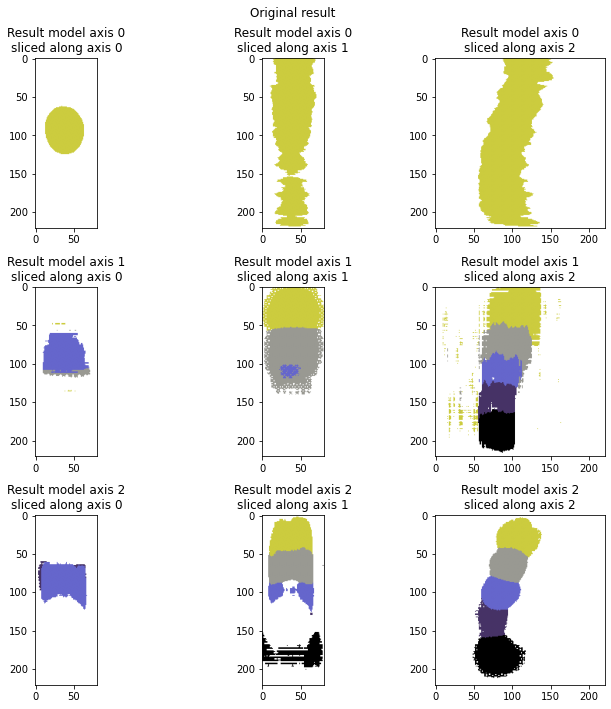

dimension from file scan_MyoSegmenTUM_016_res.npy
	from dim 0 : shape (221, 221, 81).
	from dim 1 : shape (221, 221, 81).
	from dim 2 : shape (221, 221, 81).
	




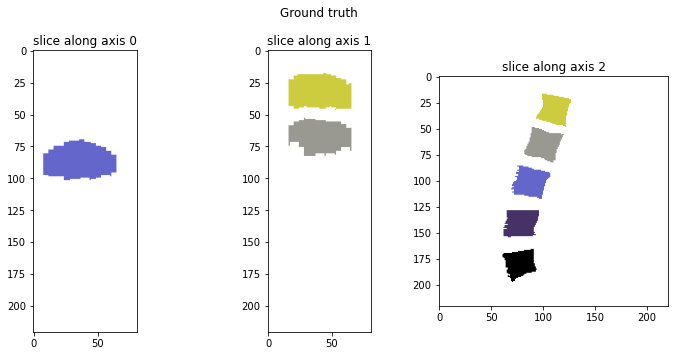

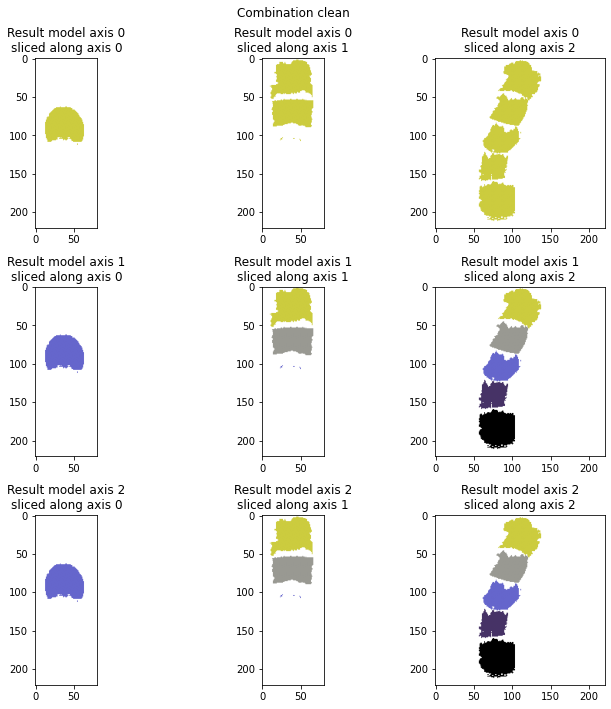

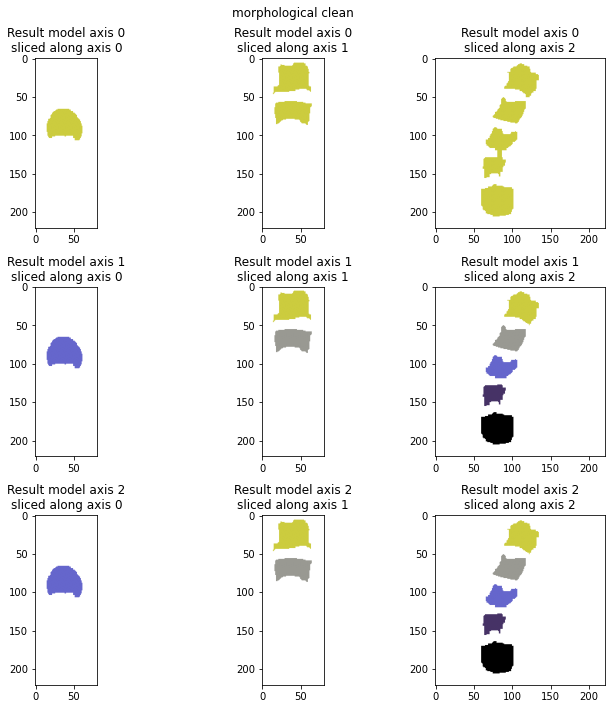

ground_truth          0        1        2        3        4        5
m0 m1 m2                                                            
0  0  0       3634381.0   1560.0   1718.0   7734.0   8401.0     29.0
1  1  1         49564.0  25561.0      NaN      NaN      NaN      NaN
   2  2         32870.0      NaN  29114.0      NaN      NaN      NaN
   3  3         22930.0      NaN      NaN  27064.0      NaN      NaN
   4  4         10220.0      NaN      NaN      NaN  23041.0      NaN
   5  5         60154.0      NaN      NaN      NaN      NaN  21780.0
ground_truth          0        1        2        3        4        5
m0 m1 m2                                                            
0  0  0       3732435.0   5034.0   6273.0  14866.0  17832.0    567.0
1  0  0          1812.0      6.0     11.0      5.0     36.0      NaN
   1  1         22803.0  22081.0      NaN      NaN      NaN      NaN
   2  2         11547.0      NaN  24548.0      NaN      NaN      NaN
   3  3          8050.0      NaN  

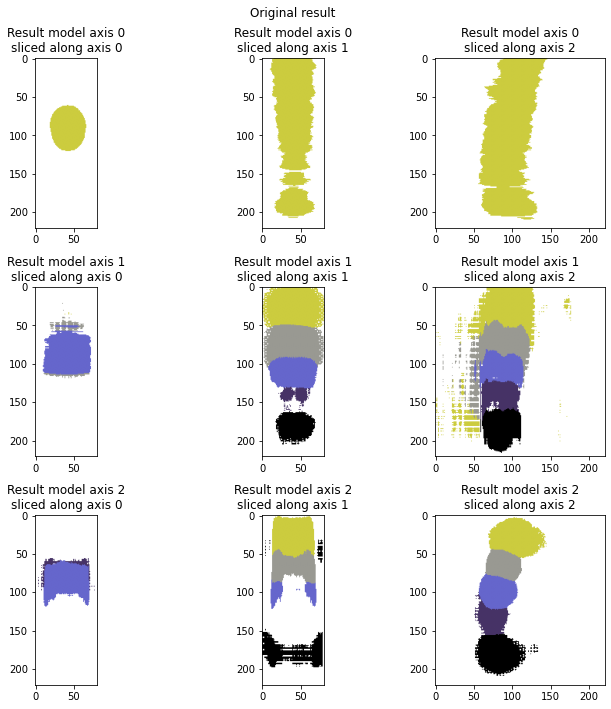

dimension from file scan_MyoSegmenTUM_014_res.npy
	from dim 0 : shape (221, 221, 81).
	from dim 1 : shape (221, 221, 81).
	from dim 2 : shape (221, 221, 81).
	




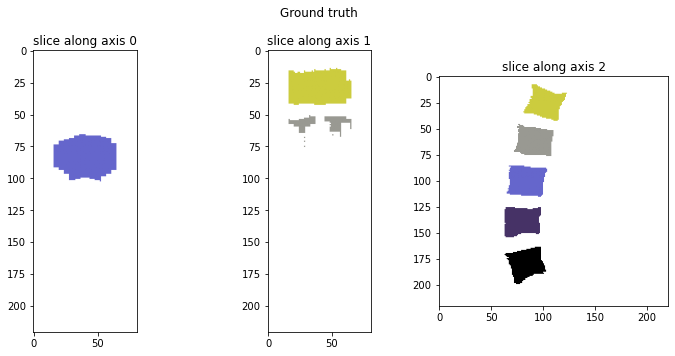

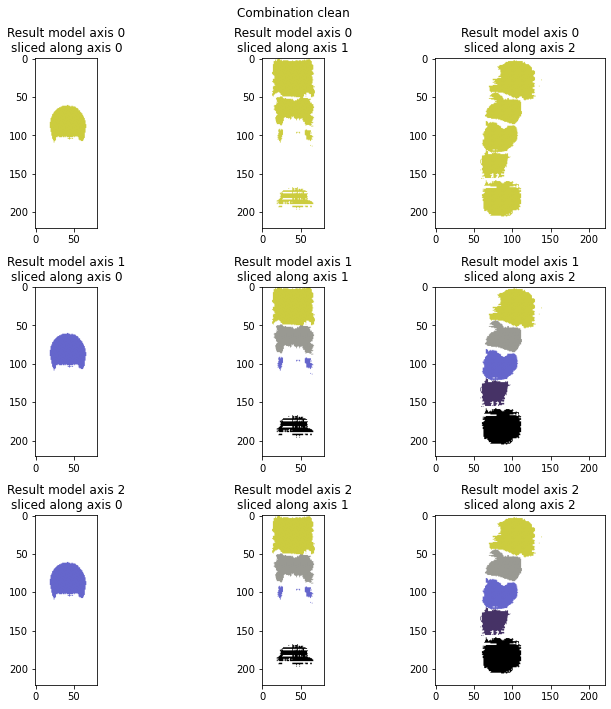

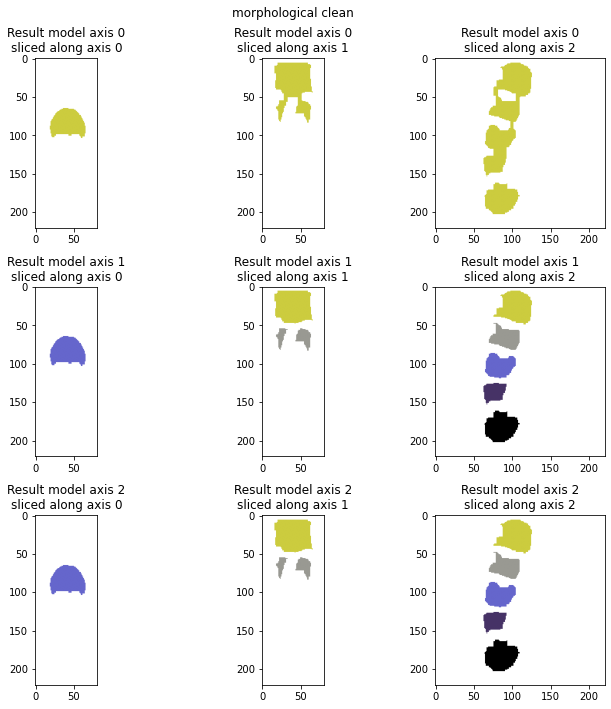

ground_truth          0        1        2        3        4        5
m0 m1 m2                                                            
0  0  0       3614536.0    613.0   5438.0   3811.0   8769.0   5322.0
1  1  1         52305.0  34663.0     18.0      NaN      NaN      NaN
   2  2         26255.0      NaN  32259.0      NaN      NaN      NaN
   3  3         25302.0      NaN      NaN  34461.0      NaN      NaN
   4  4          8890.0      NaN      NaN      NaN  32170.0      NaN
   5  5         41137.0      NaN      NaN      NaN      NaN  30172.0
ground_truth          0        1        2        3        4        5
m0 m1 m2                                                            
0  0  0       3710255.0   4181.0  12968.0  11190.0  20209.0  10576.0
1  0  0          3707.0      NaN    317.0    134.0     60.0      NaN
   1  1         21548.0  31095.0      NaN      NaN      NaN      NaN
   2  2          8079.0      NaN  24430.0      NaN      NaN      NaN
   3  3          7797.0      NaN  

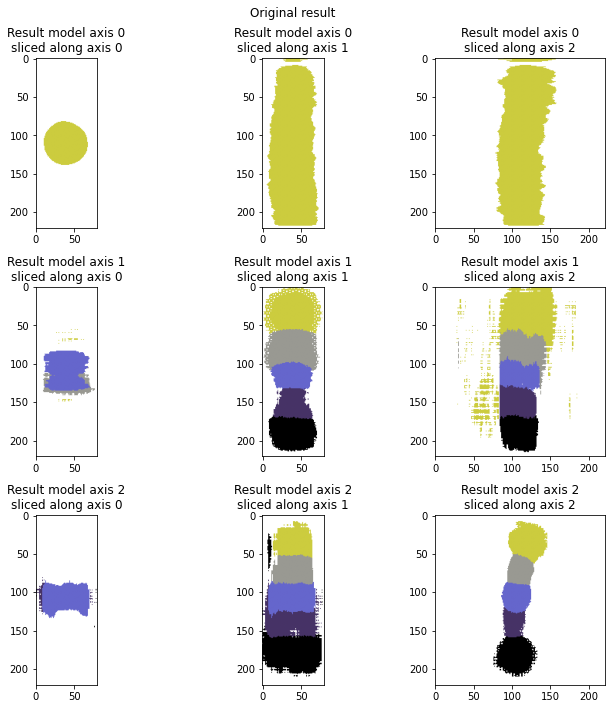

dimension from file scan_MyoSegmenTUM_046_res.npy
	from dim 0 : shape (221, 221, 80).
	from dim 1 : shape (221, 221, 80).
	from dim 2 : shape (221, 221, 80).
	




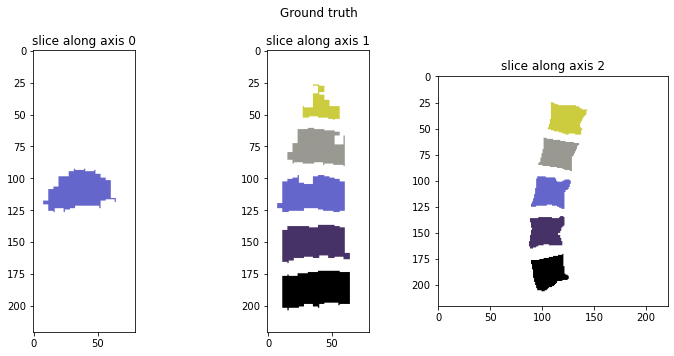

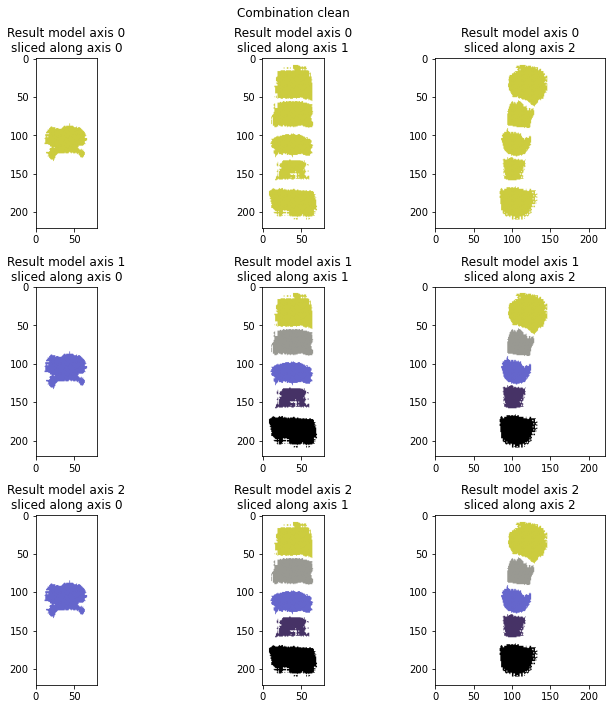

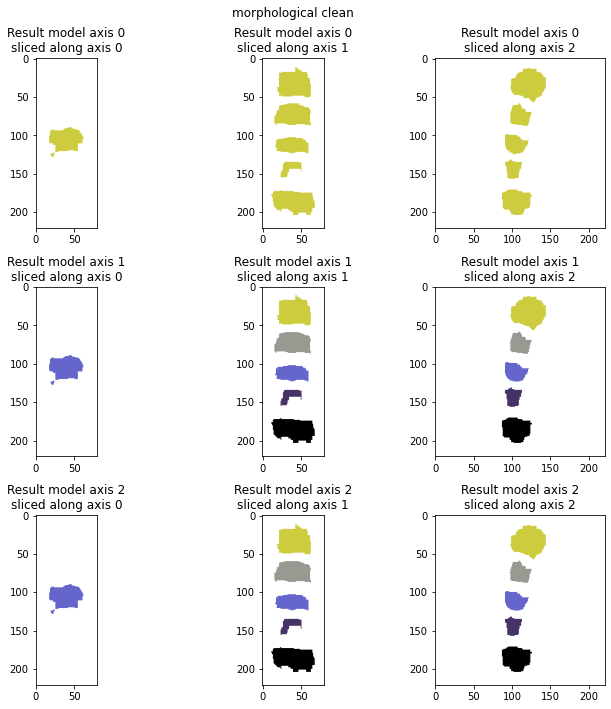

ground_truth          0        1        2        3        4        5
m0 m1 m2                                                            
0  0  0       3605690.0   1051.0   4707.0   7007.0  13858.0   1708.0
1  1  1         65835.0  28190.0      NaN      NaN      NaN      NaN
   2  2         15736.0      NaN  27201.0      NaN      NaN      NaN
   3  3         13833.0      NaN      NaN  24355.0      NaN      NaN
   4  4          9142.0      NaN      NaN      NaN  19119.0      NaN
   5  5         39036.0      NaN      NaN      NaN      NaN  30812.0
ground_truth          0        1        2        3        4        5
m0 m1 m2                                                            
0  0  0       3691836.0   4019.0  13830.0  16705.0  23985.0   7144.0
1  0  0           140.0     45.0      4.0      3.0      NaN      NaN
   1  1         36059.0  25177.0      NaN      NaN      NaN      NaN
   2  2          4067.0      NaN  18074.0      NaN      NaN      NaN
   3  3          3034.0      NaN  

In [4]:
res_folder = r'/media/jan/DataStorage/ProjectData/temp/'
folder_3d = os.path.join(res_folder, r'reconstruct_1')

dataset_1 = os.path.join(res_folder, r'dataset_1_contrast_3')

splits = ['val', 'train']
dims = [0,1, 2]
foldername = 'dimension_D_split_S'

for split in splits:
    foldernames = [foldername.replace('S', split).replace('D', str(d)) for d in dims]
    counter = 0
    for file_name in os.listdir(os.path.join(folder_3d, foldernames[0])):
        if not file_name.endswith('_res.npy'):
            continue
        if counter > 1:
            break

        volumes = {i : np.load(os.path.join(folder_3d, fn, file_name)) for i, fn in enumerate(foldernames)}
        output = [f'dimension from file {file_name}']
        output += [f'from dim {i} : shape {volumes[i].shape}.' for i in range(3)]
        output += ['\n\n']
        plot_volumes(volumes, 'Original result')
                
        print('\n\t'.join(output))
        counter += 1

        _, source, nr, _ = file_name.split('_')
        mask_filename = os.path.join(dataset_1, f'{source}_masks', f'image{nr}', 'mask_array.npy')
        ground_truth = np.load(mask_filename)
        plot_ground_truth(ground_truth)
        
        background_mask = (volumes[0] == 0)  | (volumes[1] == 0) | (volumes[2] == 0) | (volumes[1] != volumes[2])
        volumes = {i : np.where(background_mask, 0, volumes[i]) for i in range(3)}
        plot_volumes(volumes, 'Combination clean')


        volumes_cleaned = {i : clean_mask(volumes[i], iterations=2) for i in range(3)}
        plot_volumes(volumes_cleaned, 'morphological clean')

        print(occurance_counts(volumes, ground_truth))
        print(occurance_counts(volumes_cleaned, ground_truth))

        print('\n\n*********************************************************************\n\n+')


